## 텍스트 정제 전후 WordCloud 

#### 확인 가능한것
- 불필요한 단어와 의미 없는 텍스트 노이즈가 제거되었는지 시각적으로 확인
- 특수 문자의 평균 빈도가 정제 후에 줄어들었다면, 불필요한 특수 문자나 노이즈가 줄어들었음을 수치적으로 확인

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager

plt.rc('font', family='NanumGothic')
# font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

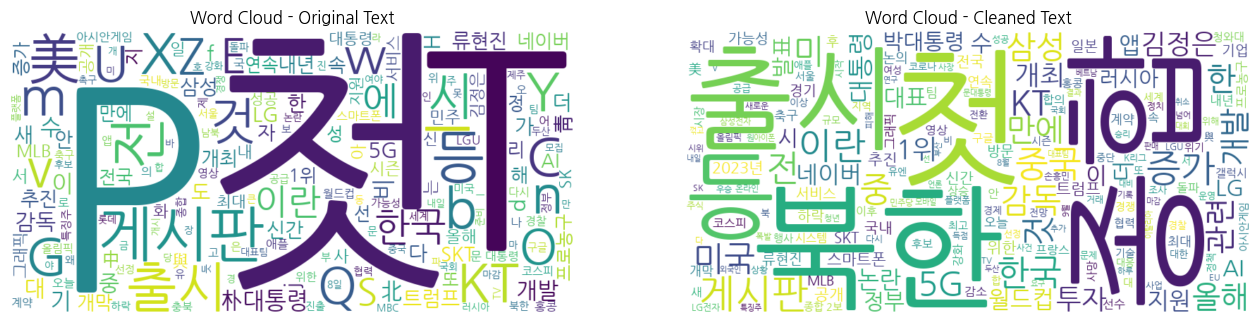

In [2]:
origin_data_path = '../../data/train.csv'
corrected_data_path = '../../combined_clean_train.csv'

origin = pd.read_csv(origin_data_path)
corrected = pd.read_csv(corrected_data_path)

font_path = '/usr/share/fonts/truetype/NanumGothic.ttf'

# 모든 텍스트 데이터를 하나의 문자열로 연결
original_text = " ".join(origin['text'].dropna().tolist())
cleaned_text = " ".join(corrected['text'].dropna().tolist())

# 원본 텍스트 워드 클라우드 생성
wordcloud_original = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(original_text)

# 정제된 텍스트 워드 클라우드 생성
wordcloud_cleaned = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(cleaned_text)

# 워드 클라우드 시각화
plt.figure(figsize=(16, 8))

# 원본 텍스트 워드 클라우드
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.title("Word Cloud - Original Text")
plt.axis("off")

# 정제된 텍스트 워드 클라우드
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.title("Word Cloud - Cleaned Text")
plt.axis("off")

plt.show()


## 텍스트 정제 전후 특수 문자 빈도 평균 비교

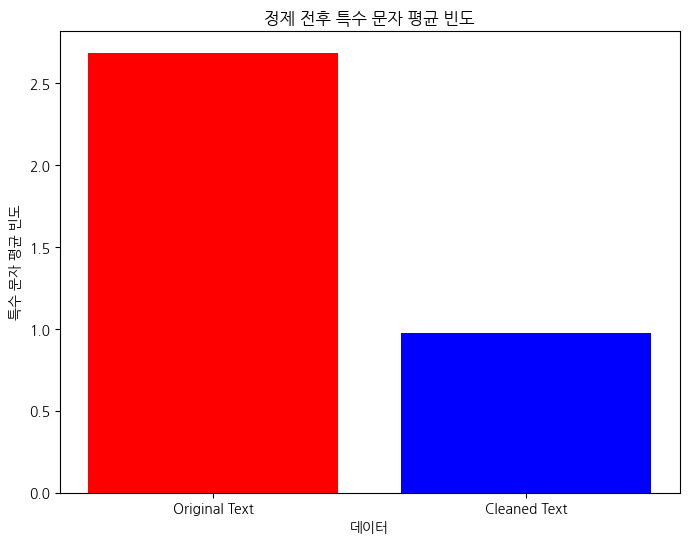

In [3]:
import re
import matplotlib.pyplot as plt

# 특수 문자 개수를 세는 함수 정의 (문자형 여부와 NaN 검사 포함)
def count_special_chars(text):
    if isinstance(text, str):  # 문자열인 경우에만 특수 문자 개수를 셈
        return len(re.findall(r"[^A-Za-z0-9가-힣\s]", text))
    return 0  # NaN이나 비문자형 데이터는 특수 문자 0으로 간주

origin_data_path = '../../data/train.csv'
corrected_data_path = '../../combined_clean_train.csv'

origin = pd.read_csv(origin_data_path)
corrected = pd.read_csv(corrected_data_path)

# 원본과 정제된 텍스트에 대해 특수 문자 개수 계산
origin['special_char_original'] = origin['text'].apply(count_special_chars)
corrected['special_char_cleaned'] = corrected['text'].apply(count_special_chars)

# 정제 전후의 특수 문자 평균 빈도 계산
mean_special_char_original = origin['special_char_original'].mean()
mean_special_char_cleaned = corrected['special_char_cleaned'].mean()

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(['Original Text', 'Cleaned Text'], [mean_special_char_original, mean_special_char_cleaned], color=['red', 'blue'])
plt.title("정제 전후 특수 문자 평균 빈도")
plt.ylabel("특수 문자 평균 빈도")
plt.xlabel("데이터")
plt.show()